# Importing Libraries

In [778]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings 
import gradio as gr 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.preprocessing import LabelEncoder 
from   joblib import dump , load
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor ,GradientBoostingRegressor 
from sklearn.model_selection  import GridSearchCV 
warnings.filterwarnings('ignore')
# plt.style.use('ggplot')
plt.style.use('default')
font={'family':'serif','color':'k','size':'13'}


# Loading The Dataset

In [779]:
df=pd.read_csv('insurance.csv')

# Exploratory Data Analysis

In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [781]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [782]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [783]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [784]:
print('there is no null values in the data')

there is no null values in the data


In [785]:
df[df.duplicated()==1]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [786]:
df=df.drop_duplicates()

In [787]:
df.duplicated().sum()

0

In [788]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [789]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

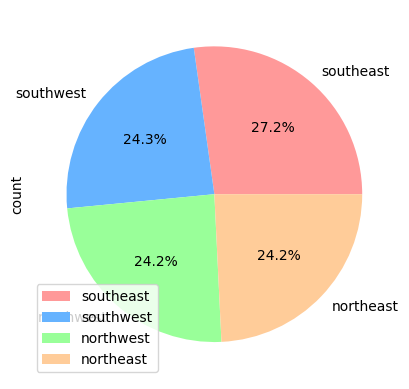

In [790]:
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
df['region'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=custom_colors)

plt.legend()
plt.show()

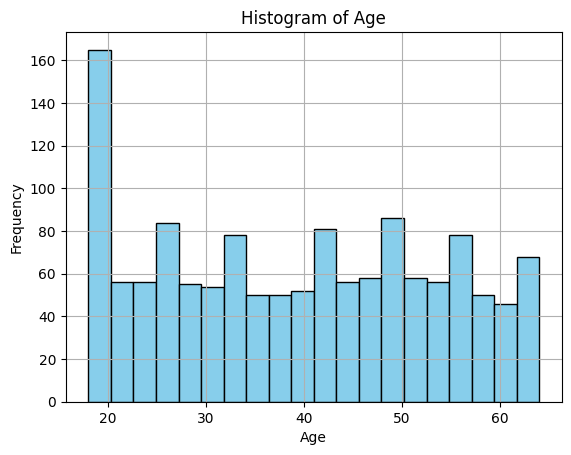

In [791]:

plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid()
plt.show()


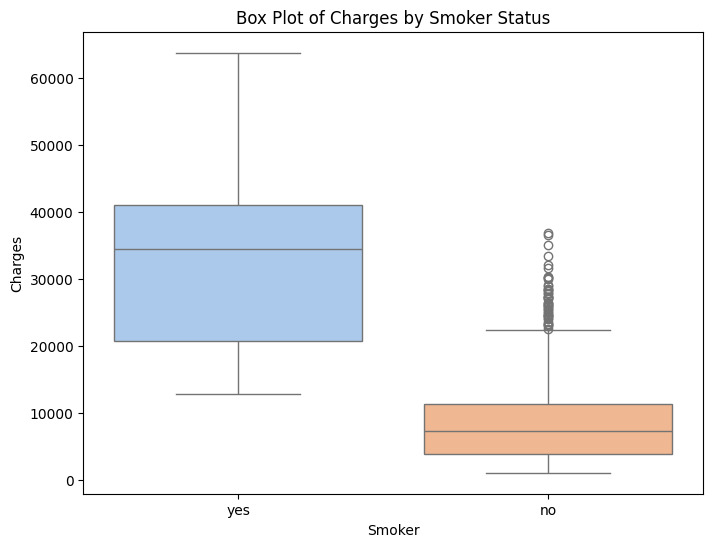

In [792]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Box Plot of Charges by Smoker Status')
plt.show()

In [793]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


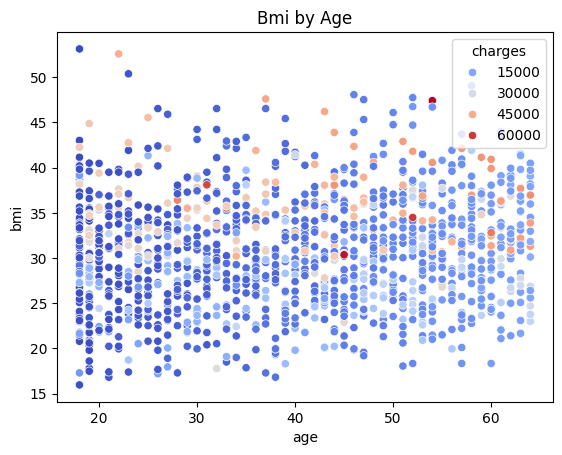

In [794]:
sns.scatterplot(x='age',y='bmi',data=df,hue='charges',palette='coolwarm')
plt.title('Bmi by Age')
plt.show()

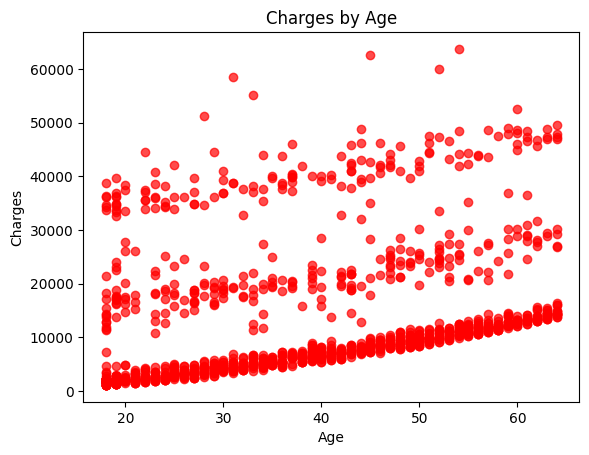

In [795]:
plt.scatter(df['age'],df['charges'],alpha=.7,color='r')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges by Age')
plt.show()

In [796]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [797]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [798]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


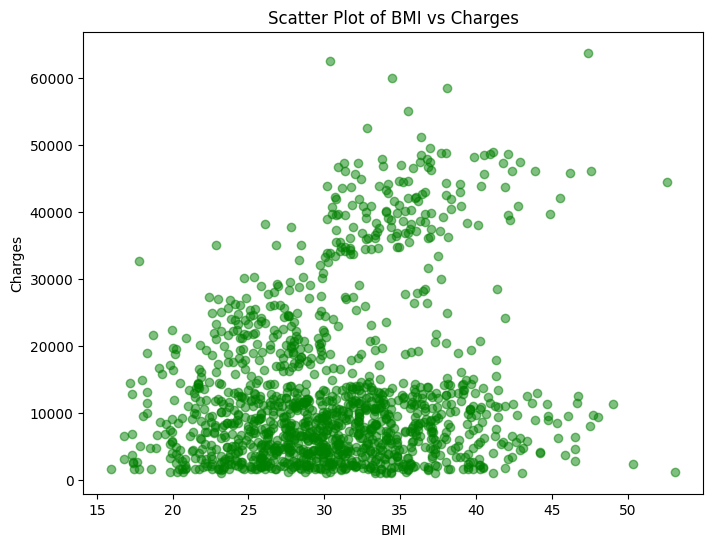

In [799]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'], color='green', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter Plot of BMI vs Charges')
plt.show()


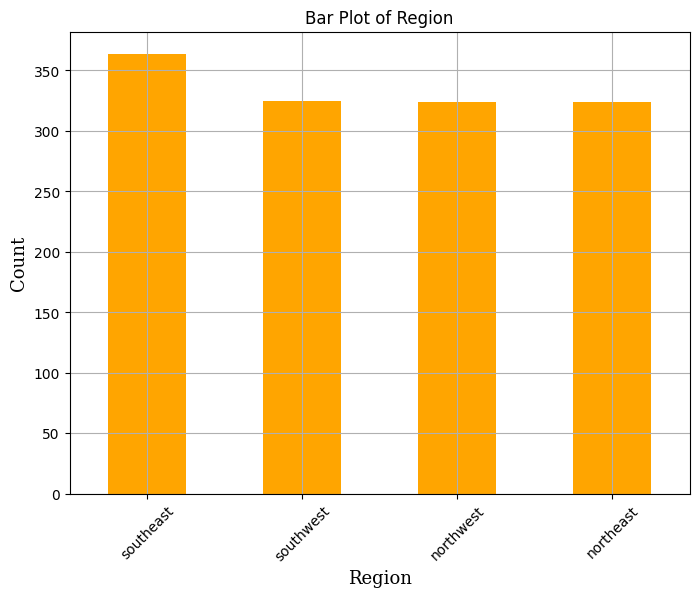

In [800]:
plt.figure(figsize=(8, 6))
df['region'].value_counts().plot(kind='bar', color='orange',width=.5)
plt.grid()
plt.xlabel('Region',fontdict=font)
plt.ylabel('Count',fontdict=font)
plt.title('Bar Plot of Region')
plt.xticks(rotation=45)
plt.show()


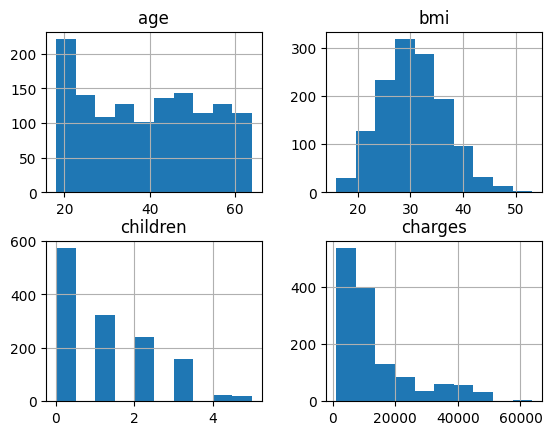

In [801]:
df.hist()
plt.show()

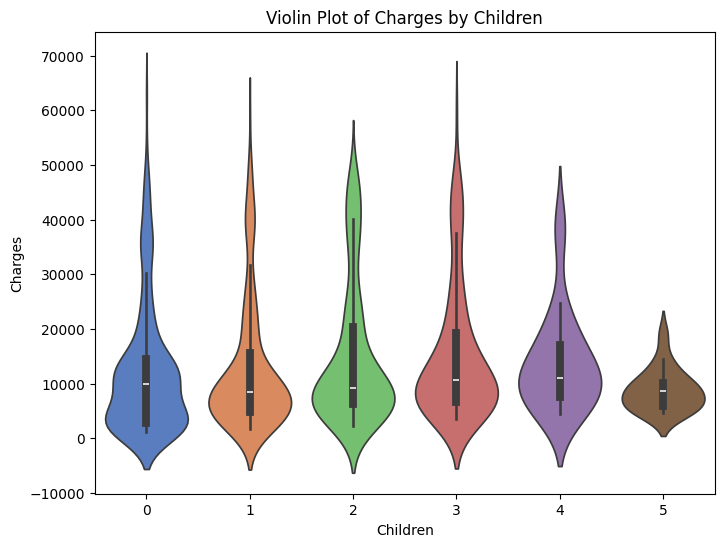

In [802]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='children', y='charges', data=df, palette='muted')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Violin Plot of Charges by Children')
plt.show()


In [803]:
df[['charges','children']].corr()

,charges,children
charges,1.000000,0.067389
children,0.067389,1.000000


In [804]:
df.iloc[:,[0,2,3,6]].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

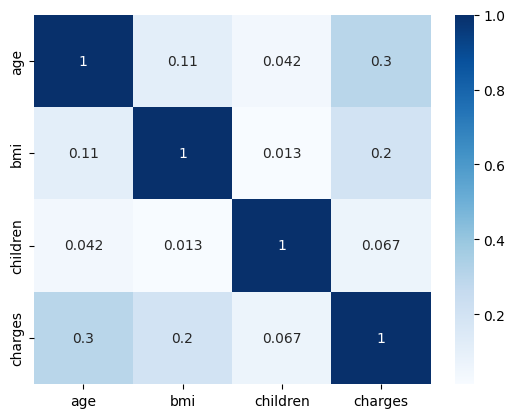

In [805]:
sns.heatmap(df.iloc[:,[0,2,3,6]].corr(),annot=True,cmap='Blues')

In [806]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


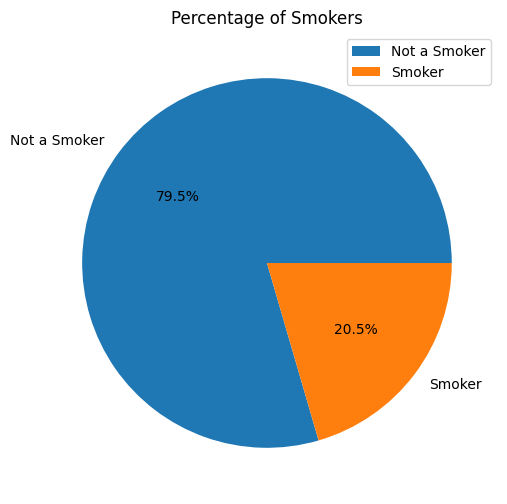

In [807]:
plt.figure(figsize=(9,6))

df['smoker'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Not a Smoker','Smoker'])
plt.ylabel('')
plt.title('Percentage of Smokers')
plt.legend()
plt.show()

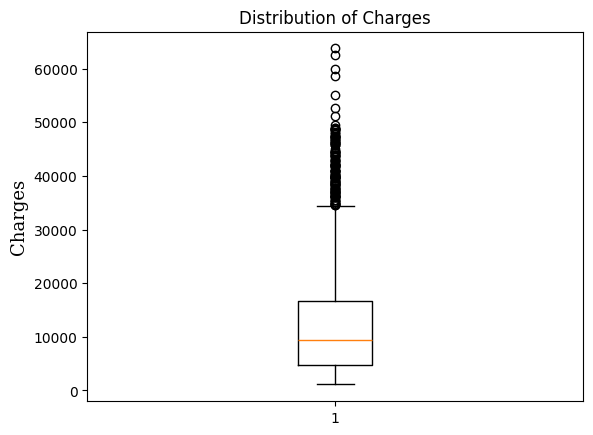

In [808]:
plt.boxplot(df['charges'])
plt.title('Distribution of Charges')
plt.xlabel('')
plt.ylabel('Charges',fontdict=font)
plt.show()

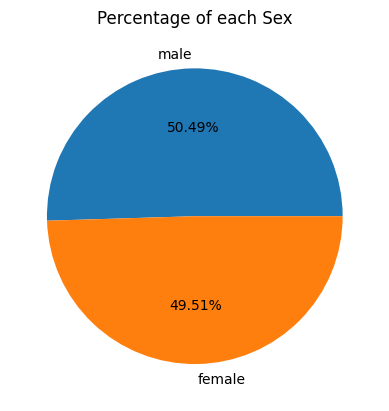

In [809]:

plt.pie(df['sex'].value_counts(),labels=['male','female'],autopct='%.2f%%')
plt.title('Percentage of each Sex')

plt.show()

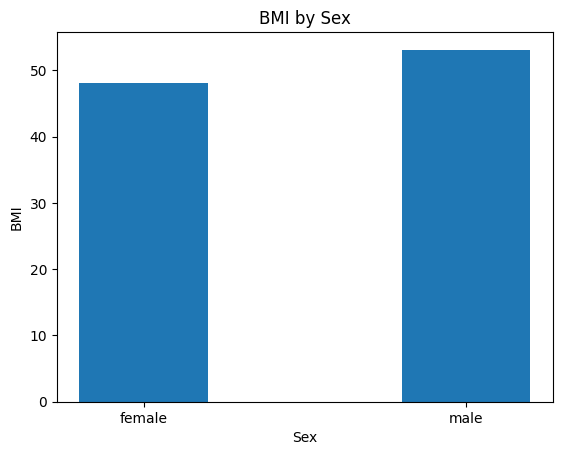

In [810]:


plt.bar(df['sex'],df['bmi'],width=.4)
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('BMI by Sex')

plt.show()

In [811]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

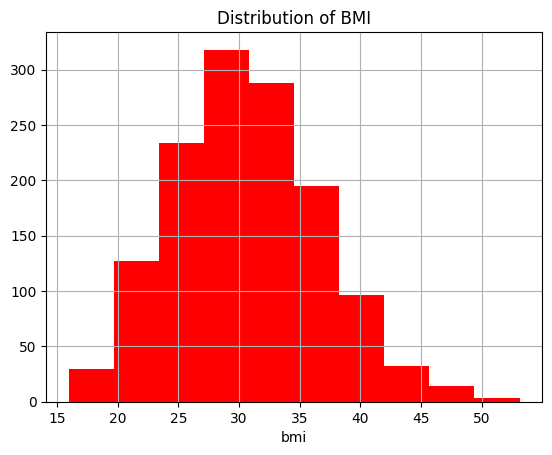

In [812]:
df['bmi'].hist(color='red')
plt.xlabel('bmi')
plt.title('Distribution of BMI')
plt.show()

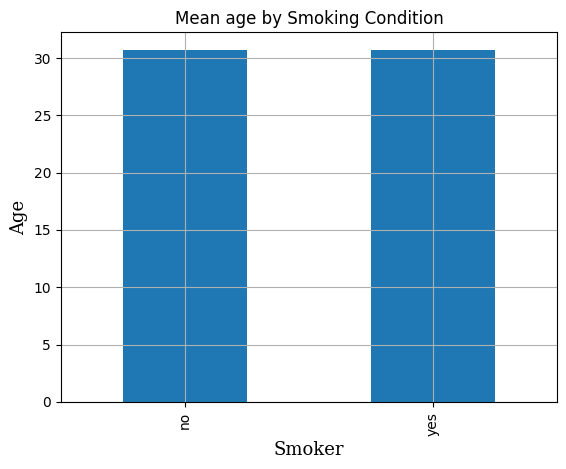

In [813]:
df.groupby('smoker')['bmi'].mean().plot(kind='bar')
plt.ylabel('Age',fontdict=font)
plt.xlabel('Smoker',fontdict=font)
plt.grid()
plt.title('Mean age by Smoking Condition')
plt.show()

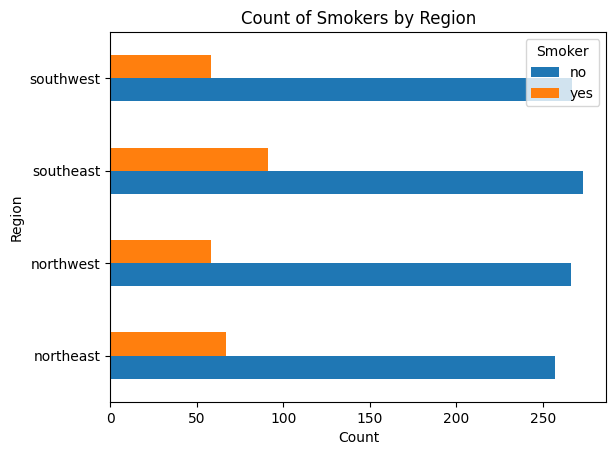

In [814]:
smokers_by_region = df.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

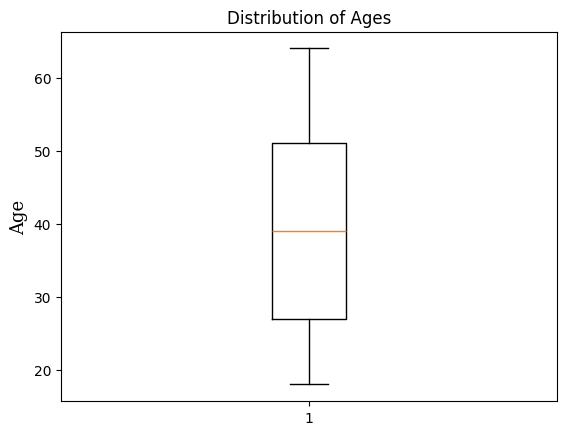

In [815]:
plt.boxplot(df['age'])
plt.ylabel('Age',fontdict=font)
plt.title('Distribution of Ages')
plt.show()

In [816]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


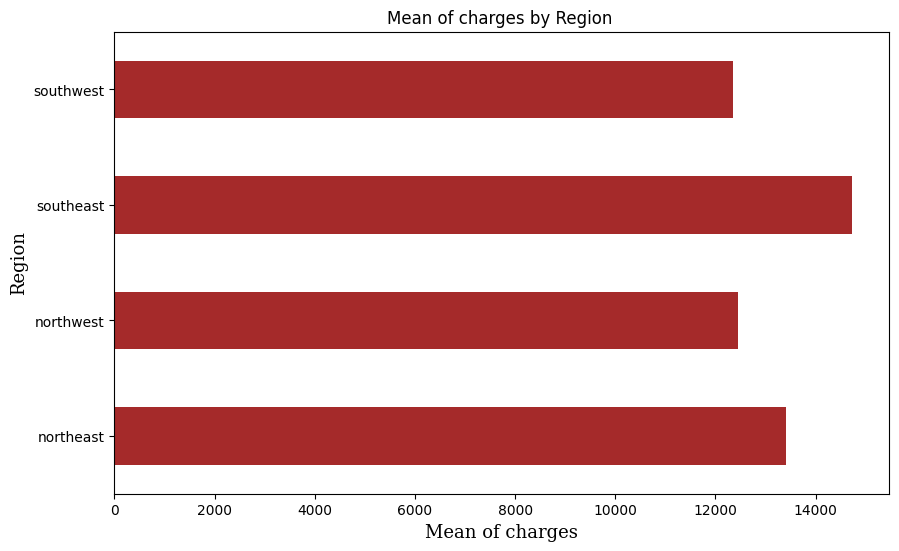

In [817]:
plt.figure(figsize=(10,6))
df.groupby('region')['charges'].mean().plot(kind='barh',color='brown')
plt.xlabel('Mean of charges',fontdict=font)
plt.ylabel('Region',fontdict=font)

plt.title('Mean of charges by Region ')
plt.show()

In [818]:
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943652
Name: bmi, dtype: float64

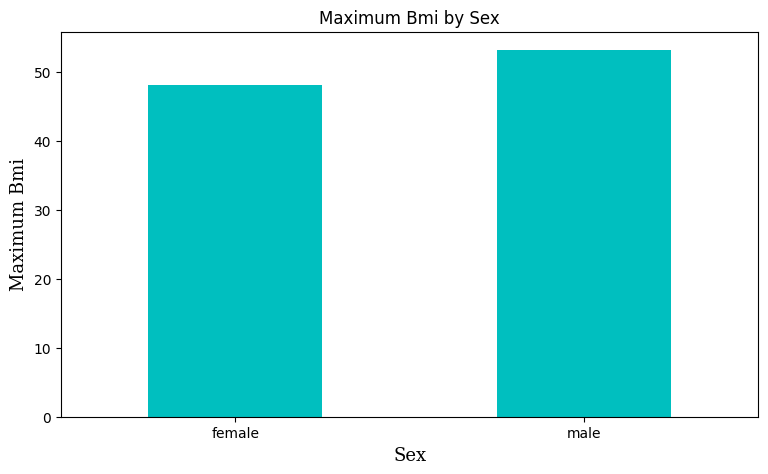

In [819]:
plt.figure(figsize=(9,5))
df.groupby('sex')['bmi'].max().plot(kind='bar',color='c')
plt.xlabel('Sex',fontdict=font)
plt.ylabel('Maximum Bmi',fontdict=font)
plt.title('Maximum Bmi by Sex')
plt.xticks(rotation=0)
plt.show()

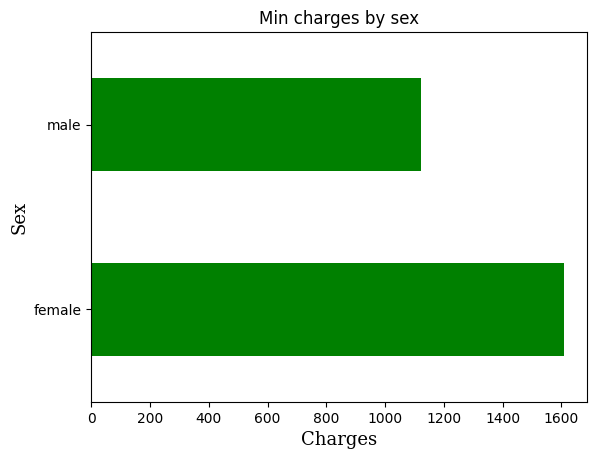

In [820]:
df.groupby('sex')['charges'].min().plot(kind='barh',color='green')
plt.title('Min charges by sex')
plt.xlabel('Charges',fontdict=font)
plt.ylabel('Sex',fontdict=font)

plt.show()

In [821]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Applying all Regrassion Models to find best of them

##  Encdoning dataset 

In [822]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [823]:

la=LabelEncoder()
la_1=LabelEncoder()
x[:,1]=la.fit_transform(x[:,1])

In [824]:
x[:,4]=la_1.fit_transform(x[:,4])
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [825]:
# {'female':0,'male':1}    {'smoker':1,'no smoker':0}    

In [826]:
# [0.0, 0.0, 0.0, 1.0] southwest 
# [0.0, 0.0, 1.0, 0.0] southeast 
# [0.0, 1.0, 0.0, 0.0] northwest
# [1.0, 0.0, 0.0, 0.0] northeast

In [827]:
x[0:5]

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       [33, 1, 22.705, 0, 0, 'northwest'],
       [32, 1, 28.88, 0, 0, 'northwest']], dtype=object)

In [828]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
x=ct.fit_transform(x)

In [829]:
x[0:5]


array([[0.0, 0.0, 0.0, 1.0, 19, 0, 27.9, 0, 1],
       [0.0, 0.0, 1.0, 0.0, 18, 1, 33.77, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 28, 1, 33.0, 3, 0],
       [0.0, 1.0, 0.0, 0.0, 33, 1, 22.705, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 32, 1, 28.88, 0, 0]], dtype=object)

In [830]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [831]:
y=y.reshape(-1,1)

In [832]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
x_train_1=x_train.copy()

## Normalizing the data 

In [833]:
sc=StandardScaler()
y_sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
y_train=y_sc.fit_transform(y_train)

In [834]:
x

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

## Linear Regression 

In [835]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

predicicting chareges of person with : 
location=southeast 
age=25
sex=female
bmi=30
children=1
smoking=smoking

In [836]:
np.set_printoptions(precision=2)
y_sc.inverse_transform(lin_reg.predict(sc.transform([[0,0,1,0,25,0,30,1,1]])))

array([[28098.12]])

In [837]:
y_pred=y_sc.inverse_transform(lin_reg.predict(x_test))
np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1)),1)

array([[ 1.63e+03,  5.17e+03],
       [ 8.55e+03,  9.51e+03],
       [ 9.29e+03,  1.14e+04],
       [ 3.25e+04,  2.60e+04],
       [ 9.64e+03,  7.13e+03],
       [ 2.68e+03,  6.76e+02],
       [ 2.20e+03,  1.91e+03],
       [ 1.24e+03, -1.46e+03],
       [ 2.71e+03,  2.17e+03],
       [ 1.22e+04,  1.46e+04],
       [ 8.28e+03,  9.82e+03],
       [ 1.70e+04,  2.67e+04],
       [ 1.40e+04,  1.43e+04],
       [ 8.22e+03,  9.39e+03],
       [ 5.47e+03,  5.31e+03],
       [ 2.44e+03,  9.97e+03],
       [ 5.27e+03,  6.19e+03],
       [ 3.49e+03,  6.08e+03],
       [ 6.64e+03,  4.64e+03],
       [ 1.47e+04,  1.49e+04],
       [ 1.62e+03,  2.54e+03],
       [ 1.32e+04,  1.21e+04],
       [ 1.26e+03,  1.83e+03],
       [ 2.64e+03,  4.44e+03],
       [ 1.67e+03,  4.05e+03],
       [ 4.67e+03,  9.06e+03],
       [ 3.73e+03,  1.55e+03],
       [ 1.16e+04,  1.23e+04],
       [ 3.76e+03,  3.97e+03],
       [ 3.75e+04,  3.00e+04],
       [ 8.06e+03,  9.21e+03],
       [ 4.75e+04,  3.88e+04],
       [

In [838]:
r2_score(y_pred,y_test)

0.6419361310423142

## polynomial regression

In [839]:
poly=PolynomialFeatures(degree=4)
x_poly_train=poly.fit_transform(x_train)
lr=LinearRegression()
lr.fit(x_poly_train,y_train)

LinearRegression()

In [840]:
y_test

array([[ 1633.96],
       [ 8547.69],
       [ 9290.14],
       [32548.34],
       [ 9644.25],
       [ 2680.95],
       [ 2198.19],
       [ 1241.57],
       [ 2710.83],
       [12235.84],
       [ 8280.62],
       [17043.34],
       [13974.46],
       [ 8219.2 ],
       [ 5472.45],
       [ 2438.06],
       [ 5267.82],
       [ 3490.55],
       [ 6640.54],
       [14692.67],
       [ 1622.19],
       [13224.69],
       [ 1256.3 ],
       [ 2643.27],
       [ 1674.63],
       [ 4667.61],
       [ 3732.63],
       [11552.9 ],
       [ 3756.62],
       [37465.34],
       [ 8059.68],
       [47462.89],
       [10577.09],
       [20630.28],
       [14571.89],
       [36580.28],
       [ 8347.16],
       [51194.56],
       [ 8428.07],
       [ 1880.49],
       [33475.82],
       [ 2867.12],
       [ 4564.19],
       [47496.49],
       [36149.48],
       [ 8125.78],
       [19749.38],
       [ 7682.67],
       [ 9880.07],
       [ 7173.36],
       [23967.38],
       [ 4137.52],
       [2356

In [841]:
y_pred_1=lr.predict(poly.fit_transform(x_test))

In [842]:
y_pred_1=y_sc.inverse_transform(y_pred_1)

In [843]:
r2_score(y_test,y_pred_1)

0.7499544737016792

### k-fold cross validation

In [844]:
accuracies=cross_val_score(estimator=lr,X=x_test,y=y_pred_1,cv=10)
accuracies.mean()

0.782556132942559

In [845]:
accuracies.std()

0.07892549970915166

## Decision Tree Regressor

In [846]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [847]:
x_test

array([[-0.56, -0.57,  1.66, ...,  1.49, -0.9 , -0.5 ],
       [-0.56, -0.57,  1.66, ..., -0.23, -0.07, -0.5 ],
       [ 1.78, -0.57, -0.6 , ...,  0.1 , -0.07, -0.5 ],
       ...,
       [-0.56, -0.57,  1.66, ..., -0.76,  0.77, -0.5 ],
       [-0.56, -0.57, -0.6 , ..., -0.93,  1.6 ,  1.99],
       [-0.56,  1.76, -0.6 , ..., -0.05,  0.77, -0.5 ]])

In [848]:
y_pred_2=tree.predict(x_test)

In [849]:
y_test.shape

(268, 1)

In [850]:
y_pred_2=y_pred_2.reshape(-1,1)

In [851]:
y_pred_2=y_sc.inverse_transform(y_pred_2)

In [852]:
y_pred_2.shape

(268, 1)

In [853]:
r2_score(y_pred_2,y_test)

0.6700690622506487

In [854]:
y_train

array([[ 0.57],
       [-1.01],
       [ 2.14],
       ...,
       [-0.76],
       [-0.96],
       [-0.15]])

## Support vector regressor 

In [855]:
sv_reg=SVR(kernel='rbf')
sv_reg.fit(x_train,y_train)

SVR()

### grid search to find best parameters

In [856]:
params = [
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.1, 0.5, 1]},
    {'kernel': ['linear'], 'C': [0.1, 1, 10]}
]

grid=GridSearchCV(estimator=sv_reg,param_grid=params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'epsilon': [0.1, 0.5, 1],
                          'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['linear']}])

In [857]:
grid.best_params_

{'C': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [858]:
grid.best_score_

0.8351455735310725

In [859]:
y_pred_3=grid.predict(x_test)

In [860]:
y_pred_3=y_pred_3.reshape(-1,1)

In [861]:
y_pred_3

array([[-8.64e-01],
       [-2.84e-01],
       [-2.21e-01],
       [ 9.71e-01],
       [-1.84e-01],
       [-7.60e-01],
       [-8.20e-01],
       [-8.92e-01],
       [-7.94e-01],
       [ 1.05e-02],
       [-3.03e-01],
       [ 6.35e-01],
       [ 1.42e-01],
       [-3.09e-01],
       [-5.56e-01],
       [-7.68e-01],
       [-5.85e-01],
       [-7.10e-01],
       [-4.48e-01],
       [ 1.66e-01],
       [-8.64e-01],
       [ 9.81e-02],
       [-9.02e-01],
       [-7.88e-01],
       [-8.76e-01],
       [-6.20e-01],
       [-6.79e-01],
       [-6.63e-02],
       [-6.91e-01],
       [ 1.59e+00],
       [-3.39e-01],
       [ 2.94e+00],
       [-1.27e-01],
       [-1.40e-01],
       [ 7.99e-02],
       [ 2.15e-01],
       [-3.04e-01],
       [ 2.23e+00],
       [-2.89e-01],
       [-8.48e-01],
       [ 1.10e+00],
       [-7.90e-01],
       [-6.06e-01],
       [ 2.87e+00],
       [ 1.76e+00],
       [-3.19e-01],
       [-1.09e-01],
       [-3.62e-01],
       [-1.85e-01],
       [-4.24e-01],


In [862]:
r2_score(y_test,y_sc.inverse_transform(y_pred_3))

0.8400926057104829

## Random Forrest Regressor 

In [863]:
forrest=RandomForestRegressor()
forrest.fit(x_train,y_train)

RandomForestRegressor()

In [864]:
y_pred_4=forrest.predict(x_test)

In [865]:
y_pred_4=y_pred_4.reshape(-1,1)

In [866]:
y_pred_4=y_sc.inverse_transform(y_pred_4)


In [867]:
accuracies_0=cross_val_score(estimator=forrest,X=x_test,y=y_test,cv=10,n_jobs=-1)

In [868]:
accuracies_0.mean()

0.824525496972295

In [869]:
r2_score(y_test,y_pred_4)

0.8343760674243128

## Xgboost Regressor

In [870]:

x_reg=XGBRegressor()
x_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [871]:
y_pred_5=x_reg.predict(x_test)

In [872]:
y_pred_5=y_sc.inverse_transform(y_pred_5.reshape(-1,1))

In [873]:
accuracies_1 = cross_val_score(estimator=x_reg, X=x_test, y=y_test, cv=10)


In [874]:
accuracies_1.mean()

0.8000500442272711

In [875]:
r2_score(y_test,y_pred_5)

0.8169730187108272

## Catboost Rgressor

In [876]:

cat_reg=CatBoostRegressor()
cat_reg.fit(x_train,y_train)

Learning rate set to 0.041377
0:	learn: 0.9673556	total: 2.1ms	remaining: 2.09s
1:	learn: 0.9402334	total: 4.35ms	remaining: 2.17s
2:	learn: 0.9133108	total: 6.8ms	remaining: 2.26s
3:	learn: 0.8851220	total: 9.22ms	remaining: 2.3s
4:	learn: 0.8602597	total: 11.6ms	remaining: 2.3s
5:	learn: 0.8347355	total: 13.9ms	remaining: 2.3s
6:	learn: 0.8113543	total: 16.1ms	remaining: 2.28s
7:	learn: 0.7898179	total: 18.3ms	remaining: 2.27s
8:	learn: 0.7682658	total: 19.8ms	remaining: 2.17s
9:	learn: 0.7484132	total: 21.3ms	remaining: 2.11s
10:	learn: 0.7296849	total: 22.8ms	remaining: 2.04s
11:	learn: 0.7095294	total: 23.8ms	remaining: 1.96s
12:	learn: 0.6907720	total: 25.1ms	remaining: 1.91s
13:	learn: 0.6732175	total: 26.4ms	remaining: 1.86s
14:	learn: 0.6567858	total: 27.8ms	remaining: 1.82s
15:	learn: 0.6409486	total: 29.1ms	remaining: 1.79s
16:	learn: 0.6266978	total: 30.1ms	remaining: 1.74s
17:	learn: 0.6124780	total: 31.3ms	remaining: 1.71s
18:	learn: 0.5991273	total: 32.7ms	remaining: 1.6

In [877]:
y_pred_6=cat_reg.predict(x_test)

In [878]:
y_pred_6=y_sc.inverse_transform(y_pred_6.reshape(-1,1))

In [879]:
accuracies_2 = cross_val_score(estimator=cat_reg, X=x_test, y=y_test, cv=10)


Learning rate set to 0.032699
0:	learn: 12970.7927782	total: 5.42ms	remaining: 5.42s
1:	learn: 12727.5355865	total: 9.81ms	remaining: 4.9s
2:	learn: 12458.0712072	total: 13.8ms	remaining: 4.59s
3:	learn: 12197.2588493	total: 15.7ms	remaining: 3.91s
4:	learn: 11990.3668623	total: 18.5ms	remaining: 3.68s
5:	learn: 11790.3557174	total: 21.3ms	remaining: 3.53s
6:	learn: 11557.8105088	total: 23.8ms	remaining: 3.38s
7:	learn: 11343.5820052	total: 26.4ms	remaining: 3.27s
8:	learn: 11119.2022322	total: 29ms	remaining: 3.19s
9:	learn: 10917.3897463	total: 31.6ms	remaining: 3.13s
10:	learn: 10711.6916545	total: 34.4ms	remaining: 3.09s
11:	learn: 10507.6398533	total: 36.3ms	remaining: 2.99s
12:	learn: 10335.1399916	total: 38.8ms	remaining: 2.94s
13:	learn: 10158.0625068	total: 40.9ms	remaining: 2.88s
14:	learn: 9968.9770853	total: 42.1ms	remaining: 2.76s
15:	learn: 9790.1823632	total: 43.3ms	remaining: 2.66s
16:	learn: 9618.7357092	total: 44.3ms	remaining: 2.56s
17:	learn: 9443.6484764	total: 45.

In [880]:
accuracies_2.mean()


0.7890534074202733

## Adaboost regressor

In [881]:
ada_reg=AdaBoostRegressor()
ada_reg.fit(x_train,y_train)


AdaBoostRegressor()

In [882]:
accuracies_3=cross_val_score(estimator=ada_reg,X=x_test,y=y_test,cv=10,n_jobs=-1)

In [883]:
accuracies_3.mean()

0.6773540166722477

## Grident boost regresor 

In [884]:
gri_reg=GradientBoostingRegressor()
gri_reg.fit(x_train,y_train)

GradientBoostingRegressor()

In [885]:
accuracies_4=cross_val_score(estimator=gri_reg,X=x_test,y=y_test,cv=10,n_jobs=-1)

In [886]:
accuracies_4.mean()

0.7852548598504393

## Saving best score model (Random Forrest)  

In [887]:

dump(forrest,'forrest.p')

['forrest.p']

In [888]:
dump(y_sc,'y_sc.joblib')

['y_sc.joblib']

## predicting a single result 

In [889]:
y_scalar=load('y_sc.joblib')
random_forrest=load('forrest.p')

In [890]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## making a single prediction 

#### for preson has : 
region = 'southwest'

age=20

gender=female

bmi=20.5

children=2

smoker

In [891]:
result=random_forrest.predict(sc.transform([[1.0, 0.0, 0.0,0.0, 20,0, 20.5, 2, 1]]))

In [892]:
result

array([0.19])

In [893]:
y_scalar.inverse_transform(result.reshape(-1,1))[0][0]

15335.805115899999

In [894]:
dump(sc,'sc.joblib')

['sc.joblib']

In [895]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
